Total investido: R$302,000.00
Valor total do patrimônio: R$1,431,340.09


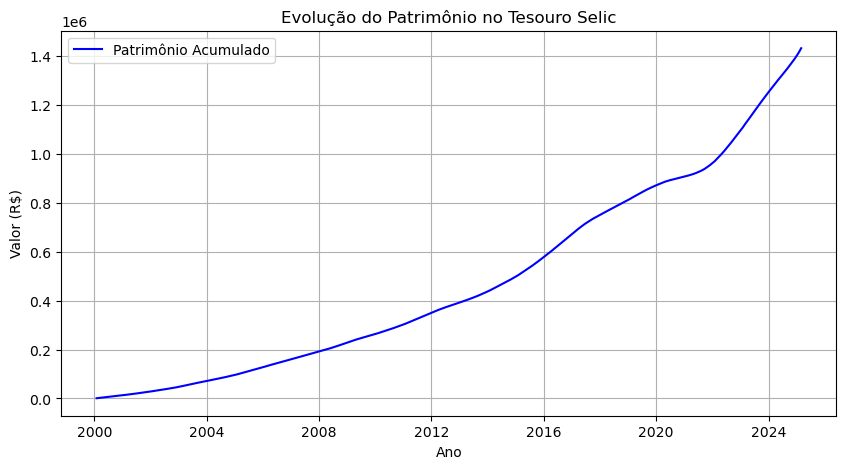

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

def get_selic_rates():
    """
    Obtém a taxa Selic histórica a partir da API do Banco Central do Brasil.
    """
    url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.1178/dados?formato=json"
    response = requests.get(url)
    
    if response.status_code != 200:
        raise ConnectionError(f"Erro ao acessar API: {response.status_code}")
    
    try:
        data = response.json()
    except ValueError:
        raise ValueError("Erro ao decodificar resposta da API")
    
    if not isinstance(data, list) or len(data) == 0:
        raise ValueError("Resposta da API está vazia ou em formato inesperado")
    
    df = pd.DataFrame(data)
    if 'data' not in df.columns or 'valor' not in df.columns:
        print("Formato inesperado da resposta da API. Exemplo de resposta:", data[:5])
        raise KeyError("A resposta da API não contém as colunas esperadas")
    
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df['valor'] = df['valor'].astype(float) / 100  # Converter para decimal
    df.set_index('data', inplace=True)
    return df

def simulate_tesouro_selic(start='2000-01-01', monthly_investment=1000):
    """
    Simula aportes mensais no Tesouro Selic desde o ano 2000.
    """
    selic_df = get_selic_rates()
    selic_df = selic_df[start:].resample('ME').last()  # Pega a taxa Selic do último dia útil do mês
    
    patrimonio = 0
    total_aportes = 0
    patrimonio_evolucao = []
    datas = []
    
    for date, row in selic_df.iterrows():
        rendimento_mensal = (1 + row['valor']) ** (1/12) - 1  # Ajusta para rendimento mensal
        patrimonio = (patrimonio + monthly_investment) * (1 + rendimento_mensal)
        total_aportes += monthly_investment
        
        patrimonio_evolucao.append(patrimonio)
        datas.append(date)
    
    print(f"Total investido: R${total_aportes:,.2f}")
    print(f"Valor total do patrimônio: R${patrimonio:,.2f}")
    
    # Plotando gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(datas, patrimonio_evolucao, label='Patrimônio Acumulado', color='blue')
    plt.xlabel('Ano')
    plt.ylabel('Valor (R$)')
    plt.title('Evolução do Patrimônio no Tesouro Selic')
    plt.legend()
    plt.grid()
    plt.show()

simulate_tesouro_selic()

